<a href="https://colab.research.google.com/github/koki-223/my-first-Repository/blob/main/Copy_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

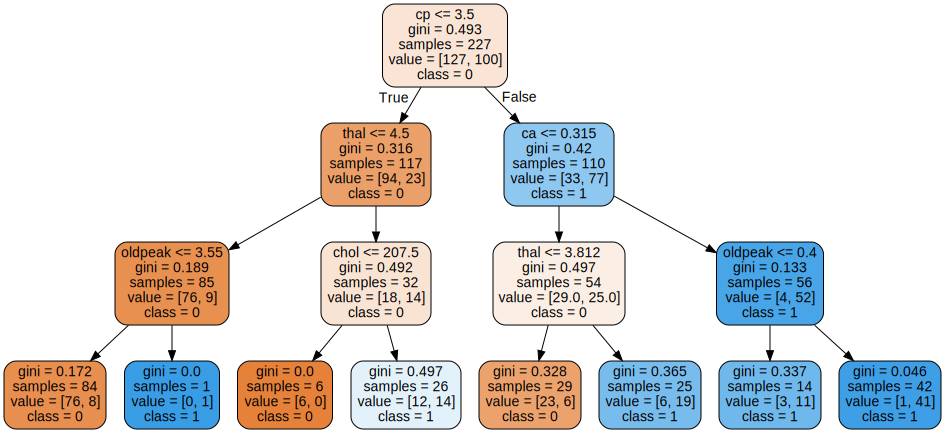

In [6]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

Best Bagged Classifier: BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=50, random_state=42)


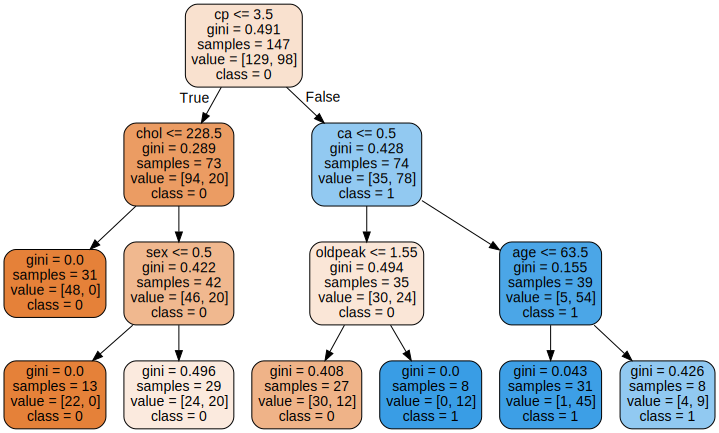

In [9]:
from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with DecisionTreeClassifier as base
bagged_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Define hyperparameters to search (e.g., number of estimators)
params_bag = {'n_estimators': [10, 50, 100], 'estimator__max_depth': [3, 6, 9]}

gridcv_bag = GridSearchCV(bagged_clf, params_bag, scoring='accuracy', cv=5)
gridcv_bag.fit(X_train, y_train)

print("Best Bagged Classifier:", gridcv_bag.best_estimator_)

# Optional: visualize one base estimator
tree = gridcv_bag.best_estimator_.estimators_[0]

plot_data = export_graphviz(tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

Best Random Forest: RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)


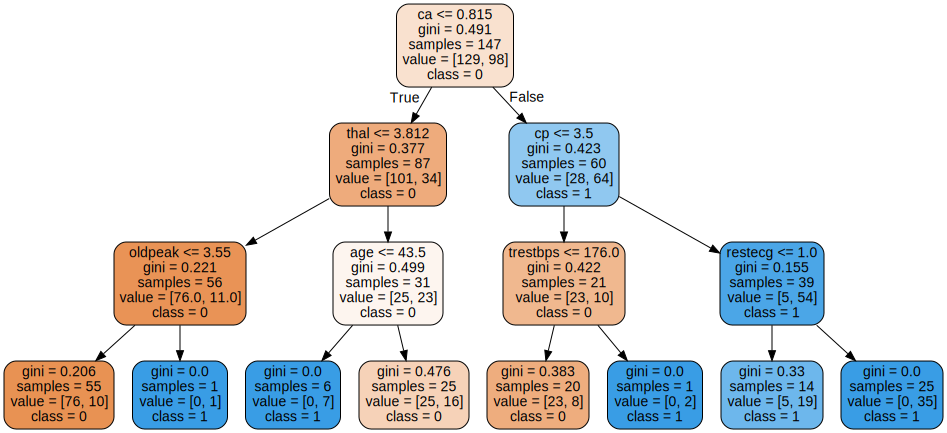

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
params_rf = {'n_estimators': [10, 50, 100], 'max_depth': [3, 6, 9]}

gridcv_rf = GridSearchCV(rf_clf, params_rf, scoring='accuracy', cv=5)
gridcv_rf.fit(X_train, y_train)

print("Best Random Forest:", gridcv_rf.best_estimator_)

# Optional: visualize one tree from the forest
tree = gridcv_rf.best_estimator_.estimators_[0]

plot_data = export_graphviz(tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph


#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [11]:
import pandas as pd
import graphviz
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Load data
data = pd.read_csv("heart_disease.csv", na_values="?")

# Split X and y
y = data["label"]
X = data.drop("label", axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [12]:
pipe_dt = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("clf", DecisionTreeClassifier(random_state=42))
])

params_dt = {
    "clf__max_depth": [3, 6, 9],
    "clf__min_samples_split": [2, 5, 10],
    "clf__criterion": ["gini", "entropy"]
}

grid_dt = GridSearchCV(pipe_dt, params_dt, scoring="accuracy", cv=5)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 6, 9],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [15]:
pipe_bag = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("clf", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42))
])

params_bag = {
    "clf__n_estimators": [10, 50],
    "clf__estimator__max_depth": [3, 6, 9],
    "clf__max_samples": [0.5, 1.0]
}

grid_bag = GridSearchCV(pipe_bag, params_bag, scoring="accuracy", cv=5)
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                          random_state=42))]),
             param_grid={'clf__estimator__max_depth': [3, 6, 9],
                         'clf__max_samples': [0.5, 1.0],
                         'clf__n_estimators': [10, 50]},
             scoring='accuracy')

In [16]:
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("clf", RandomForestClassifier(random_state=42))
])

params_rf = {
    "clf__n_estimators": [10, 50],
    "clf__max_depth": [3, 6, 9],
    "clf__max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(pipe_rf, params_rf, scoring="accuracy", cv=5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 6, 9],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__n_estimators': [10, 50]},
             scoring='accuracy')

In [17]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Decision Tree": grid_dt,
    "Bagged Trees": grid_bag,
    "Random Forest": grid_rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"{name} → Accuracy: {acc:.4f}, F1 Macro: {f1:.4f}")


Decision Tree → Accuracy: 0.7895, F1 Macro: 0.7895
Bagged Trees → Accuracy: 0.8684, F1 Macro: 0.8681
Random Forest → Accuracy: 0.8816, F1 Macro: 0.8814


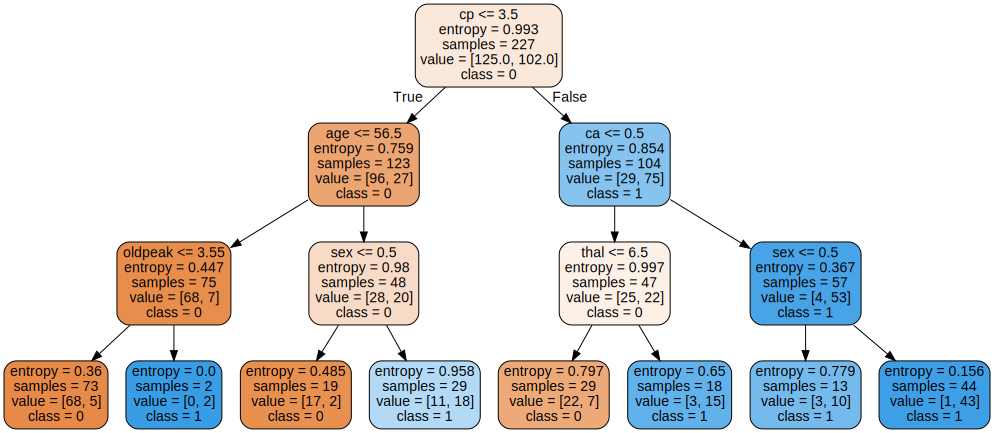

In [18]:
# Best tree from DT or Bagging/Forest's first tree
best_tree = grid_dt.best_estimator_.named_steps["clf"]

plot_data = export_graphviz(best_tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=X.columns,
                            class_names=["0", "1"])

graph = graphviz.Source(plot_data)
graph  # Will display tree in Jupyter or notebook
